In [ ]:
import os

print(os.getcwd())


/content


In [ ]:
import pandas as pd


# Modificar los paths segun el equipo que se este utilizando
path_in = "/content/"
path_out = "/content/"

df = pd.read_stata(path_in + "f_ingreso.dta")
df.head()




,entidad,edad,raba,edu,hextra_edu,w,sexo,li,ecivil,dh,reprobacion,trend
0,Guerrero,19.0,NaN,NaN,ninguno,350.0,Mujer,1.0,0.0,1.0,0.0,2.0
1,Guerrero,17.0,decidiÓ empezar a trabajar,NaN,NaN,650.0,Mujer,1.0,1.0,1.0,0.0,14.0
2,Guerrero,19.0,NaN,NaN,NaN,250.0,Hombre,1.0,1.0,1.0,0.0,41.0
3,Guerrero,15.0,NaN,NaN,NaN,250.0,Mujer,1.0,1.0,1.0,0.0,46.0
4,Guerrero,21.0,decidiÓ empezar a trabajar,NaN,NaN,1500.0,Hombre,1.0,0.0,1.0,0.0,53.0


## Importación
Este es un archivo de Stata (Software estadístico), sin embargo, podemos importarlo de la misma forma que hicimos con el archivo “.csv” en el capítulo anterior, el siguiente código muestra este proceso.  

utilizamos las funciones de descripción de datos de Pandas para una primera inspección:

In [ ]:
# Nos muestra las primeras 5 filas del DataFrame
df.head()


#Proporciona un resumen del número de filas, columnas, tipos de datos
# y valores no nulos
df.info()


# Genera un resumen de las principales estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12048 entries, 0 to 12047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   entidad      12048 non-null  category
 1   edad         12048 non-null  category
 2   raba         10969 non-null  category
 3   edu          777 non-null    category
 4   hextra_edu   743 non-null    category
 5   w            12048 non-null  category
 6   sexo         12048 non-null  category
 7   li           12048 non-null  float32 
 8   ecivil       12048 non-null  float32 
 9   dh           12048 non-null  float32 
 10  reprobacion  11966 non-null  float32 
 11  trend        12048 non-null  float32 
dtypes: category(7), float32(5)
memory usage: 342.9 KB


,li,ecivil,dh,reprobacion,trend
count,12048.000000,12048.000000,12048.000000,11966.000000,12048.000000
mean,0.214807,0.751162,0.060591,0.187364,33288.265625
std,0.410712,0.432355,0.238584,0.390242,19077.644531
min,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,1.000000,0.000000,0.000000,17702.500000
50%,0.000000,1.000000,0.000000,0.000000,32416.500000
75%,0.000000,1.000000,0.000000,0.000000,48798.250000
max,1.000000,1.000000,1.000000,1.000000,70155.000000


 ### Profundizando en las Métricas Descriptivas Numéricas

La función “df.describe()” nos da un excelente resumen inicial. Sin embargo, para entender a fondo la forma de la distribución de una variable, podemos calcular métricas más específicas como la varianza, la asimetría (skewness) y la curtosis (kurtosis). El siguiente código nos muestra cómo obtener estas métricas y un resumen de percentiles más detallado

In [ ]:
#!pip install scipy
#!pip install statsmodels
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas

In [ ]:
import scipy.stats as stats


# aseguramos que el tipo de dato sea numérico

df['w'] = df['w'].astype(float)


# Calculamos la varianza, asimetría y curtosis

print("Variance: ", df['w'].var())
print("Skewness: ", stats.skew(df['w']))
print("Kurtosis: ", stats.kurtosis(df['w'], fisher=False))


# Obtenemos una descripción con percentiles personalizados

print(df['w'].describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

Variance:  244346.0998311082
Skewness:  5.824668452317433
Kurtosis:  54.82044265396446
count    12048.000000
mean       459.666335
std        494.313767
min          2.000000
1%          30.000000
5%          80.000000
10%        149.400000
25%        240.000000
50%        360.000000
75%        500.000000
90%        800.000000
95%       1000.000000
99%       2801.590000
max       8000.000000
Name: w, dtype: float64


## Visualización de la distribución univariada

Para visualizar la distribución de una variable, como el ingreso (w), la herramienta más adecuada es un histograma. Un histograma agrupa los datos en intervalos (bins) y cuenta cuántas observaciones caen en cada uno, revelando la forma, el centro y la dispersión de la variable.
    

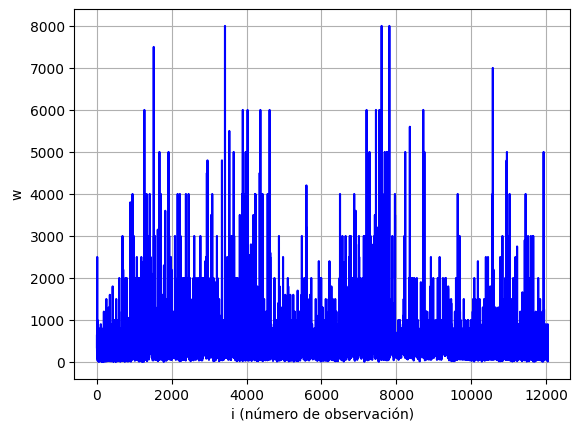

In [ ]:
import matplotlib.pyplot as plt

# Generamos una columna para el número de observación

df['i'] = range(1, len(df) + 1)

# Graficamos la variable 'w' contra el número de observación

plt.plot(df['i'], df['w'], linestyle='-', marker='', color='blue')
plt.xlabel('i (número de observación)')
plt.ylabel('w')
plt.grid(True)
plt.show()

Si bien el gráfico anterior nos muestra el comportamiento de los datos según su orden, para entender su distribución estadística (es decir, qué valores son más frecuentes sin importar el orden), la herramienta más adecuada es un histograma.

<Axes: >

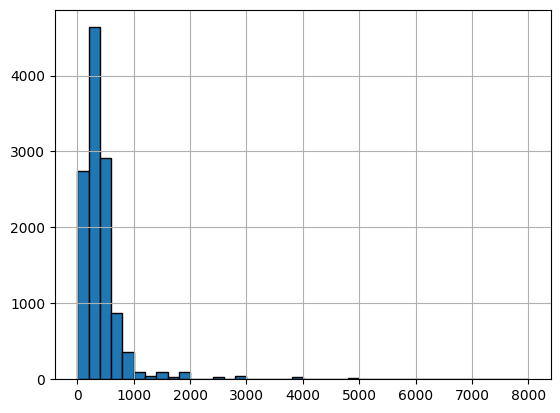

In [ ]:
import pandas as pd


df['w'].hist(bins = 40, edgecolor = "black")

Si bien un histograma es útil, su forma puede variar dependiendo de la elección de los “bins”. Una alternativa más avanzada y suave es la Estimación de Densidad del Kernel (KDE, por sus siglas en inglés).

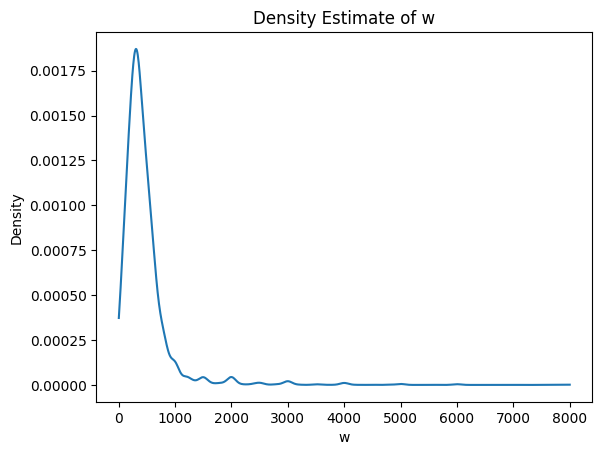

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


data = df['w']
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 1000)


# Generar el plot
plt.plot(x_range, kde(x_range))
plt.title('Density Estimate of w')
plt.xlabel('w')
plt.ylabel('Density')
plt.show()

## 6.2.4 Análisis Descriptivo por Grupos

Hasta ahora, hemos analizado la variable “w” (salario) de forma aislada, sin embargo, en econometría es fundamental entender cómo una variable numérica se relaciona con una categórica. Por ejemplo, ¿el ingreso promedio (w) varía entre las distintas entidades federativas (entidad)?  

Como ejemplo de esto podemos primeramente filtrar el DataFrame para calcular estadísticas descriptivas para subgrupos específicos, para ello, utilizamos una técnica llamada indexación booleana.

In [ ]:
# Calcular estadísticas descriptivas para grupo 'preparatoria o bachillerato'
print("Estadísticas para 'preparatoria o bachillerato':")
print(df[df['edu'] == "preparatoria o bachillerato"]['w'].describe())
print("\n" + "-"*50 + "\n") # Separador


# Calcular estadísticas descriptivas para grupo 'carrera técnica o comercial' print("Estadísticas para 'carrera técnica o comercial':")
print(df[df['edu'] == "carrera técnica o comercial"]['w'].describe())

Estadísticas para 'preparatoria o bachillerato':
count     209.000000
mean      240.459330
std       244.691544
min        12.000000
25%       100.000000
50%       160.000000
75%       300.000000
max      2000.000000
Name: w, dtype: float64

--------------------------------------------------

count      35.000000
mean      438.428571
std       512.561003
min        60.000000
25%       275.000000
50%       300.000000
75%       500.000000
max      3200.000000
Name: w, dtype: float64


Al igual que en los ejemplos de análisis univariado, podemos graficar también por grupos, lo que permite enriquecer el análisis de forma sustancial. Para esto, la función “groupby()” de pandas es la herramienta por excelencia, la cual combinada con la librería “Seaborn”, permite generar visualizaciones claras y efectivas.

<Axes: ylabel='entidad'>

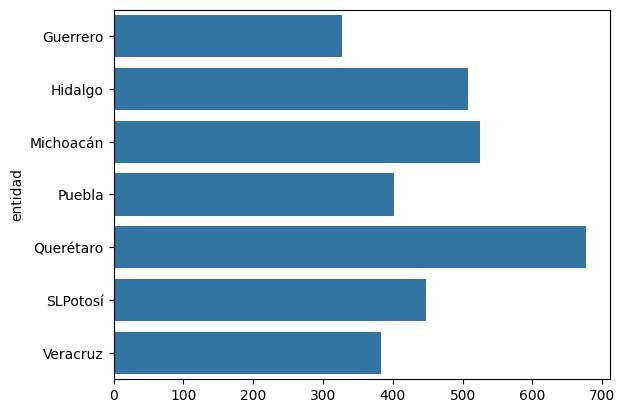

In [ ]:
import seaborn as sns


# Agrupar por 'entidad', calcular la media de 'w' y ordenar los resultados mean_by_entidad=df.groupby('entidad',observed=False)['w'].mean().sort_values()
mean_by_entidad=df.groupby('entidad',observed=False)['w'].mean().sort_values()


# Crear el gráfico de barras horizontal con Seaborn
sns.barplot(x=mean_by_entidad.values, y=mean_by_entidad.index, orient="h")

Una de las relaciones más estudiadas en economía es la que existe entre el nivel de educación y el ingreso. Vamos a explorarla de tres maneras: un gráfico de dispersión, un gráfico con línea de tendencia y estadísticas numéricas por grupo. Una forma directa de visualizar la relación entre el nivel educativo (edu) y el ingreso (w) es con un “scatterplot”. Seaborn coloca las categorías de edu en el eje X y mostrar la distribución de w para cada una.

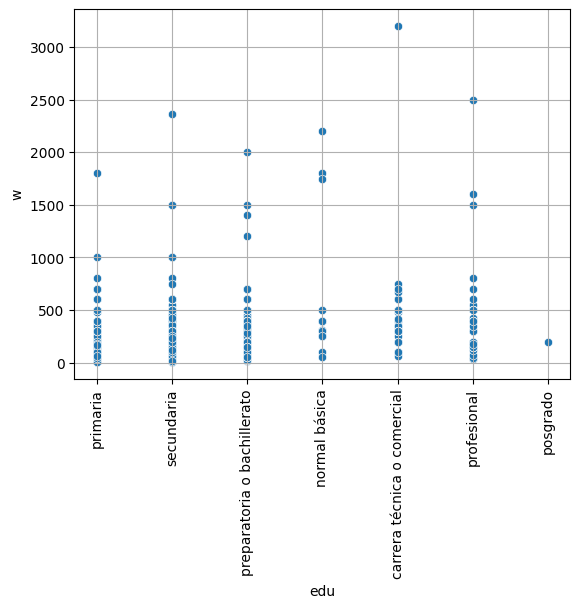

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=df, x='edu', y='w')
plt.xticks(rotation= 90)
plt.grid(True)
plt.show()

Este gráfico nos permite ver la distribución de ingresos para cada nivel educativo.  Para visualizar una tendencia lineal de forma más explícita, podemos usar “sns.regplot”. Sin embargo, esta función requiere que el eje X sea numérico. Por lo tanto, primero debemos convertir nuestra variable categórica “edu” a una variable numérica ordinal, y posteriormente graficar usando la librería “Seaborn”.

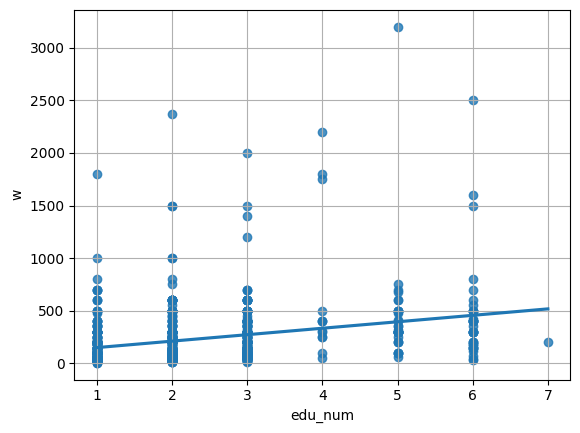

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creamos un diccionario para mapear cada nivel educativo a un número
edu_order = {

    'primaria': 1,

    'secundaria': 2,

    'preparatoria o bachillerato': 3,

    'normal básica': 4,

    'carrera técnica o comercial': 5,

    'profesional': 6,

    'posgrado': 7
}

# Creamos una nueva columna numérica 'edu_num' usando el mapeo
df['edu_num'] = df['edu'].map(edu_order)


# creamos el gráfico de regresión
sns.regplot(data=df, x='edu_num', y='w', scatter=True, ci=None)
plt.ylabel('w')
plt.grid(True)
plt.show()

## 6.3.1. Correlación de Pearson (Lineal)

La correlación de Pearson mide la fuerza de la relación lineal entre dos variables numéricas. El resultado varía entre -1 (relación lineal negativa perfecta) y +1 (relación lineal positiva perfecta). Un valor cercano a 0 indica la ausencia de una relación lineal. Para calcularla, usamos el método “.corr()” de pandas sobre las columnas de interés, reutilizando el diccionario y la columna 'edu_num' que creamos antes.  

In [ ]:
%%time

# diccionario para las categorias
edu_numeric = {
    "preescolar o kinder": 1,
    "primaria": 2,
    "secundaria": 3,
    "preparatoria o bachillerato": 4,
    "normal básica": 5,
    "carrera técnica o comercial": 6,
    "profesional": 7,
    "posgrado": 8,
    "no sabe nivel": 9
}

df['edu_num'] = df['edu'].map(edu_numeric)

corr = df[['w', 'edu_num']].corr(method='pearson')
print(corr)

                w   edu_num
w        1.000000  0.268727
edu_num  0.268727  1.000000
CPU times: user 6.99 ms, sys: 0 ns, total: 6.99 ms
Wall time: 8.65 ms


## 6.3.2. Correlación de Spearman

¿Qué pasa si la relación no es estrictamente lineal, pero sigue una tendencia (a medida que una variable crece, la otra también lo hace, quizás a un ritmo cambiante)? Aquí es donde la correlación de Spearman es más útil. La correlación de Spearman mide la fuerza de la relación (que siempre va en la misma dirección). Funciona sobre los rangos de los datos, no sobre sus valores brutos, lo que la hace menos sensible a valores atípicos.  

In [ ]:
from scipy.stats import spearmanr


# Quitar valores null
filtered_df = df[['w', 'edu_num']].dropna()


# Correlacion de Spearman
corr, p_value = spearmanr(filtered_df['w'], filtered_df['edu_num'])


print("Numer of obs: ", len(filtered_df))
print(f"Spearman rho: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Numer of obs:  777
Spearman rho: 0.3277
P-value: 0.0000


## 6.3.3. Correlación de Spearman (otros datos)

Finalmente, aplicamos la misma técnica para explorar otra relación fundamental en economía: la que existe entre el ingreso (w) y la edad (edad), que a menudo sirve como un indicador de la experiencia en el mercado laboral.

In [ ]:
from scipy.stats import spearmanr


# Ambas columnas deben ser numéricas, convirtiendo errores en NaN
df['w'] = pd.to_numeric(df['w'], errors='coerce')
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')


# Correlacion de Spearman
corr, p_value = spearmanr(df['w'], df['edad'], nan_policy='omit')



print("Numer of obs: ", len(df))
print(f"Spearman rho: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Numer of obs:  12048
Spearman rho: 0.1970
P-value: 0.0000


## 6.4 De la Descripción a la Teoría: Distribuciones de Probabilidad

### Ejemplo 1. Distribución Normal

Para este primer ejemplo estimaremos los parámetros de una distribución normal (media y desviación estándar); la distribución de los ingresos en el mundo real rara vez es normal, sin embargo, nuestro objetivo es puramente pedagógico, por lo cual vamos a simular artificialmente datos de ingresos que sigan una distribución normal perfecta.  

In [ ]:
import numpy as np
from scipy import stats

# Generar datos ficticios: Ingresos mensuales de hogares (en miles de dólares)

np.random.seed(42)  # Para reproducibilidad
ingresos = np.random.normal(loc=3.5, scale=0.8, size=1000)  # Media=3.5, desviación estándar=0.8, 100 observaciones
ingresos = np.round(ingresos, 2) # Redondear a 2 decimales para realismo


# Estimar parámetros de la distribución normal

mu, sigma = stats.norm.fit(ingresos)


# Imprimir resultados

print(f"Media estimada: {mu:.2f} mil dólares")
print(f"Desviación estándar estimada: {sigma:.2f} mil dólares")

Media estimada: 3.52 mil dólares
Desviación estándar estimada: 0.78 mil dólares


Después de estimar los parámetros μ y σ, el siguiente paso es comprobar visualmente qué tan bien la distribución normal teórica (usando estos parámetros estimados) se ajusta a nuestros datos observados. Para esto podemos hacer uso del histograma y la curva de la Función de Densidad de Probabilidad para evaluar si la suposición de normalidad es razonable.

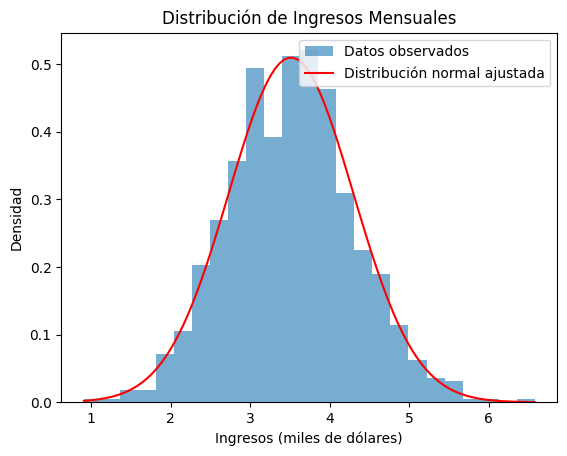

In [ ]:
import matplotlib.pyplot as plt

# Visualizar la distribución

x = np.linspace(min(ingresos), max(ingresos), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.hist(ingresos, bins=25, density=True, alpha=0.6, label="Datos observados")
plt.plot(x, pdf, 'r-', label="Distribución normal ajustada")
plt.title("Distribución de Ingresos Mensuales")
plt.xlabel("Ingresos (miles de dólares)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

### Ejemplo 2: Distribución Log-Normal

Ahora, realizaremos un ejercicio paralelo para la distribución Log-Normal. Esta distribución es más realista para modelar ingresos, ya que es siempre positiva y tiene una asimetría a la derecha. Sus parámetros no son una media y desviación estándar directas, sino que se definen por la media (μ) y la desviación estándar (σ) del logaritmo natural de la variable.

In [ ]:
import numpy as np
from scipy import stats


# Utilizamos la misma semilla para comparación

np.random.seed(42)


# Parámetros del LOGARITMO de la variable

mu_log_real = np.log(3.5) # Media del logaritmo de los datos (aprox 1.25)
sigma_log_real = 0.4 # Desviación estándar del logaritmo de los datos
ingresos_lognormal = np.random.lognormal(mean=mu_log_real, sigma= sigma_log_real,  size=1000)

# Estimar parámetros desde los datos

# Para una log-normal estándar, fijamos loc=0

# El 'shape' (s) corresponde a sigma, y el 'scale' corresponde a exp(mu)
shape_est, loc_est, scale_est = stats.lognorm.fit(ingresos_lognormal, floc=0)


# Derivamos los parámetros del logaritmo a partir de los resultados estimados sigma_log_estimado = shape_est
sigma_log_estimado = shape_est
mu_log_estimado = np.log(scale_est)


print("\n--- DISTRIBUCIÓN LOG-NORMAL ---")
print(f"Parámetro 'μ' real (media del log): {mu_log_real:.4f}")
print(f"Parámetro 'μ' estimado (media del log): {mu_log_estimado:.4f}\n")
print(f"Parámetro 'σ' real (std dev del log): {sigma_log_real:.4f}")
print(f"Parámetro 'σ' estimado (std dev del log): {sigma_log_estimado:.4f}")


--- DISTRIBUCIÓN LOG-NORMAL ---
Parámetro 'μ' real (media del log): 1.2528
Parámetro 'μ' estimado (media del log): 1.2605

Parámetro 'σ' real (std dev del log): 0.4000
Parámetro 'σ' estimado (std dev del log): 0.3915


## 6.5 Algoritmo de regresión para el análisis económico

### Regresión Lineal  

Para este ejemplo, nuestro objetivo es modelar el ingreso (w) en función del estado civil (ecivil), el nivel educativo (edu_num), si tiene dependientes (dh) y las horas extra de educación (hextra_edu_num); el siguiente código realiza un pequeño preprocesamiento de los datos y genera el modelo de regresión.  

In [ ]:
import statsmodels.api as sm

# Crear una copia del DataFrame con las columnas que usaremos
df_reg = df[['w', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()

# Reemplazar valores de texto con códigos numéricos
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg['hextra_edu_num'] = df_reg['hextra_edu'].replace(hextra_map)

# Convertir a valores numéricos, los errores se convierten en NaN
df_reg['hextra_edu_num'] = pd.to_numeric(df_reg['hextra_edu_num'], errors='coerce')


# Quitar las filas que contengan al menos un valor NaN y resetear el índice
df_reg = df_reg.dropna().reset_index(drop=True)


# Definir la variable dependiente (y) y las independientes (X)
X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]



# Añadir una constante (el intercepto) al modelo
# Esto es necesario para que statsmodels estime la ordenada al origen (β₀)
y = df_reg['w']
X = sm.add_constant(X)


# Estimar el modelo
model = sm.OLS(y, X).fit()

# El "término de error" se estima a través de los residuales del modelo.
# Calculamos los residuales (e = y - ŷ) y los añadimos al DataFrame. df_reg['termino_error_estimado'] = model.resid
# Calcular e imprimir la Raíz del Error Cuadrático Medio (RMSE)
root_mse = np.sqrt(model.mse_resid)

print("Root MSE:", round(root_mse, 2))
print(model.summary())

Root MSE: 273.71
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     31.41
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           3.84e-24
Time:                        18:44:53   Log-Likelihood:                -5109.0
No. Observations:                 727   AIC:                         1.023e+04
Df Residuals:                     722   BIC:                         1.025e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            418.5868  

/tmp/ipython-input-42-62377095.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg['hextra_edu_num'] = df_reg['hextra_edu'].replace(hextra_map)
/tmp/ipython-input-42-62377095.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_reg['hextra_edu_num'] = df_reg['hextra_edu'].replace(hextra_map)


Podemos también guardar los resultados del modelo, para esto podemos exportar los datos como a un archivo .txt como una cadena de texto, o podemos guardarlo como un archivo .csv.  

In [ ]:
#Como archivo TXT


with open(path_out + "mco_regresion_summary.txt", "w") as f:
    f.write(str(model.summary()))


#Como archivo csv

results_df_mco = pd.DataFrame({
    "Variables": model.params.keys(),
    "Coeficient": model.params,
    "Std error:": model.bse,
    "t-value": model.tvalues,
    "P-value": model.pvalues

})


results_df_mco.to_csv(path_out + "mco_regresion_summary.csv", index = False)



Para el caso del archivo .csv, utilizamos un diccionario en lugar de usar el resumen completo, accedemos directamente a los atributos numéricos de la variable “model” para obtener los coeficientes, errores estándar (bse), valores t y p-values por separado. Colocamos estas dos opciones a manera de ejemplo para que el lector conozca las opciones disponibles y decida el formato más conveniente de acuerdo con su necesidad.  

De igual forma podemos guardar los residuales del modelo para futuros análisis, el siguiente código muestra las dos opciones presentadas anteriormente.  

## 6.6 Pruebas estadísticas del Modelo

### 6.6.1 Prueba de Normalidad de los Residuos

Uno de los supuestos del modelo clásico de regresión lineal es que los residuos (e=y−y^ ) siguen una distribución normal. Si este supuesto se cumple, podemos confiar plenamente en las pruebas t, la prueba F y los intervalos de confianza, sobre todo en muestras pequeñas. Si los residuos no son normales, a menudo es un síntoma de un problema más profundo en la especificación de nuestro modelo.

In [ ]:
from scipy.stats import normaltest, skew, kurtosis, chi2


residuales = model.resid
n_obs = len(residuales)


# skew & kurtosis

skew_val = skew(residuales, bias = False)
kurtosis_val = kurtosis(residuales)
statistics, pvalue = normaltest(residuales)



print(f"Skew: {skew_val:.4f}")
print(f"Kurtosis: {kurtosis_val:.4f}")
print(f"statistics: {statistics:.4f}")
print(f"Pvalue: {pvalue:.4f}")



if pvalue <0.05:

    print("Null hypothesis rejected")
    print("The residuals are not normally distributted!")

Skew: 4.3776
Kurtosis: 30.1008
statistics: 701.9121
Pvalue: 0.0000
Null hypothesis rejected
The residuals are not normally distributted!


### 6.6.2 Prueba de Heteroscedasticidad

Otro de los supuestos clave en la regresión es la homocedasticidad, que significa que la varianza de los residuos es constante para todos los niveles de las variables explicativas. Lo contrario es la heterocedasticidad, donde la varianza del error no es constante. Si hay heterocedasticidad:

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan



bp_test = het_breuschpagan(residuales, model.model.exog)
bp_stat, bp_pval, f_stat, f_pval = bp_test

print(f"Breusch-Pagan test statistic (chi2): {bp_stat:.4f}")
print(f"P-value (LM test): {bp_pval:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {f_pval:.4f}")


if bp_pval < 0.05:

    print("Null hypothesis rejected")
    print("The residuals exhibit heteroskedasticity!")

Breusch-Pagan test statistic (chi2): 25.8434
P-value (LM test): 0.0000
F-statistic: 6.6529
P-value: 0.0000
Null hypothesis rejected
The residuals exhibit heteroskedasticity!


### 6.6.3 Prueba de Especificación del Modelo (Test RESET de Ramsey)

Después de analizar los residuos, damos un paso más allá para evaluar la especificación general de nuestro modelo. El test RESET de Ramsey (Regression Equation Specification Error Test) es una prueba general diseñada para detectar dos problemas fundamentales.

 Las hipótesis son:

Hipótesis Nula (H0) El modelo está correctamente especificado. Los coeficientes de las potencias de los valores predichos son todos iguales a cero (no añaden poder explicativo).

Hipótesis Alternativa (HA) El modelo tiene un error de especificación (variables omitidas o forma funcional incorrecta). Al menos uno de los coeficientes de las potencias es distinto de cero.

In [ ]:
import statsmodels.api as sm
import numpy as np


# Obtener valores del model.exog original

fitted_values = model.fittedvalues
exog  = model.model.exog # variables explicativas original


# Crear los valores para (y^2, y^3, y^4)

yhat2 = fitted_values**2
yhat3 = fitted_values**3
yhat4 = fitted_values**4


# matriz exog

exog_augmented = np.column_stack((exog, yhat2, yhat3, yhat4))


# Modelo de regresion aumentada usando el model.model.endog

augmented_model = sm.OLS(model.model.endog, exog_augmented).fit()


# F-test para yhat2, yhat3, yhat4

restrictions = np.zeros((3, exog_augmented.shape[1]))
restrictions[:, -3:] = np.eye(3) # Test last 3 coefficients = 0

f_test = augmented_model.f_test(restrictions)



print(f"F-statistic: {f_test.statistic:.4f}")
print(f"P-value: {f_test.pvalue:.4f}")


if f_test.pvalue < 0.05:

    print("Null hypothesis rejected")
    print("The model has omitted variables or incorrect functional form!")

else:

    print("Fail to reject null hypothesis")
    print("No evidence of omitted variables or incorrect functional form.")

F-statistic: 3.8119
P-value: 0.0100
Null hypothesis rejected
The model has omitted variables or incorrect functional form!


### 6.6.4 Prueba de Multicolinealidad (Factor de Inflación de la Varianza - VIF)

La última prueba de diagnóstico que realizaremos es para la multicolinealidad. La multicolinealidad ocurre cuando las variables explicativas (independientes) en un modelo de regresión están altamente correlacionadas entre sí. Esto no significa que estén correlacionadas con la variable dependiente “y”, sino más bien entre ellas.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd



# Preparar la matriz de variables independientes (X)

X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
X = sm.add_constant(X) # Añade el intercepto


# Calcular el VIF para cada variable

# Se genera un DataFrame para almacenar los resultados de forma ordenada

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Calcular la Tolerancia (1/VIF)

vif_data["1/VIF"] = 1 / vif_data["VIF"]


# Calcular el VIF promedio (excluyendo la constante)

mean_vif = vif_data.loc[vif_data["Variable"] != "const", "VIF"].mean()



print(vif_data)
print(f"\nMean VIF: {mean_vif:.2f}")



if (vif_data["VIF"] > 5).any():

    print("Warning: High multicollinearity detected (VIF > 5)!")

else:

    print("No significant multicollinearity (all VIFs ≤ 5).")

         Variable        VIF     1/VIF
0           const  56.615337  0.017663
1          ecivil   1.002933  0.997075
2         edu_num   1.081283  0.924827
3              dh   1.018442  0.981892
4  hextra_edu_num   1.064174  0.939696

Mean VIF: 1.04


### 6.6.5 Refinamiento del Modelo Mediante Transformación Logarítmica

En las secciones anteriores, nuestras pruebas de diagnóstico actuaron como un sistema de alarma, alertándonos sobre tres problemas clave en nuestro modelo inicial:

Los residuos no seguían una distribución normal.

El modelo presentaba heterocedasticidad.  

El modelo sufría de un error de especificación (según la prueba RESET).

#### Paso 1: Creación de la Variable Logarítmica

Primero, aplicamos la transformación en nuestro DataFrame usando la función log de NumPy

In [ ]:
import numpy as np



df['lw'] = np.log(df['w'])
df.head()

,entidad,edad,raba,edu,hextra_edu,w,sexo,li,ecivil,dh,reprobacion,trend,i,edu_num,lw
0,Guerrero,19.0,NaN,NaN,ninguno,350.0,Mujer,1.0,0.0,1.0,0.0,2.0,1,NaN,5.857933
1,Guerrero,17.0,decidiÓ empezar a trabajar,NaN,NaN,650.0,Mujer,1.0,1.0,1.0,0.0,14.0,2,NaN,6.476972
2,Guerrero,19.0,NaN,NaN,NaN,250.0,Hombre,1.0,1.0,1.0,0.0,41.0,3,NaN,5.521461
3,Guerrero,15.0,NaN,NaN,NaN,250.0,Mujer,1.0,1.0,1.0,0.0,46.0,4,NaN,5.521461
4,Guerrero,21.0,decidiÓ empezar a trabajar,NaN,NaN,1500.0,Hombre,1.0,0.0,1.0,0.0,53.0,5,NaN,7.313220


#### Paso 2: Re-estimación del Modelo (Modelo Log-Nivel)

Ahora, volveremos a correr exactamente la misma regresión, pero esta vez utilizando “lw” como nuestra variable dependiente. Este tipo de modelo, donde la variable dependiente está en logaritmos y las independientes están en sus unidades originales ("niveles"), se conoce como un modelo log-nivel.

In [ ]:
import statsmodels.api as sm
import numpy as np



# Creamos una copia del DataFrame con las nuevas variables

df_reg2 = df[['lw', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()
# Remplazar categorias

hextra_map = {'ninguno': 0, 'no sabe': 98}

df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)
df_reg2['hextra_edu_num'] = pd.to_numeric(df_reg2['hextra_edu_num'], errors='coerce')


# Quitar valores null

df_reg2 = df_reg2.dropna().reset_index(drop=True)


# Definimos las nuevas variables X, y

X2 = df_reg2[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
y2 = df_reg2['lw']
X2 = sm.add_constant(X2)



# Estimamos el nuevo modelo y mostramos la tabla de resultados

model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     41.22
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           3.86e-31
Time:                        18:46:30   Log-Likelihood:                -993.69
No. Observations:                 727   AIC:                             1997.
Df Residuals:                     722   BIC:                             2020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9048      0.266     18.

/tmp/ipython-input-50-721749717.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)
/tmp/ipython-input-50-721749717.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)


### 6. 7 Simulaciones

En economía, la incertidumbre es una característica inherente de fenómenos como los retornos financieros, los precios de mercado o los efectos de políticas económicas. Los algoritmos de simulación, como el método de Monte Carlo, permiten modelar esta incertidumbre generando escenarios aleatorios basados en distribuciones estadísticas, como la normal o log-normal, que son fundamentales en econometría. Estas simulaciones nos ayudan a estimar riesgos, evaluar resultados probables y tomar decisiones informadas.

#### Simulación de Monte Carlo para el Valor en Riesgo (VaR)

El método de Monte Carlo simula múltiples escenarios de una variable económica (por ejemplo, retornos de una cartera) utilizando una distribución estadística, como la log-normal, que es común en finanzas debido a la naturaleza positiva y asimétrica de los retornos. El algoritmo implica: (1) definir los parámetros de la distribución, (2) generar simulaciones aleatorias, (3) calcular los valores finales de la cartera, y (4) estimar el VaR.

#### ¿Porque una distribución de tipo log-normal en el ejemplo anterior?

Los retornos financieros (o factores de crecimiento de una inversión) son inherentemente positivos, ya que el valor de una cartera no puede ser negativo (en el peor caso, cae a cero). Una distribución normal permite valores negativos, lo que no es realista para modelar retornos diarios o precios de activos. Así mismo, la distribución log-normal, al estar definida solo para valores positivos (0 > y > 0), es más adecuada para representar el comportamiento de los retornos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# Parámetros de la simulación

mu = 0.05 # Retorno esperado anual
sigma = 0.2 # Volatilidad anual
n_simulaciones = 10_000 # Número de simulaciones
n_dias = 252 # Días hábiles en un año
inversion_inicial = 1000 # Inversión inicial en dólares


# Simular retornos diarios con una distribución log-normal
np.random.seed(42) # Para reproducibilidad
retornos_diarios = np.random.lognormal(mean=mu/n_dias, sigma=sigma/np.sqrt(n_dias), size=(n_simulaciones, n_dias))

# Calcular valores finales de la cartera
valores_finales = inversion_inicial * np.exp(np.sum(np.log(retornos_diarios), axis=1))


# Calcular VaR al 5%
VaR_5 = np.percentile(valores_finales - inversion_inicial, 5)

print(f"Valor en Riesgo (VaR) al 5%: ${-VaR_5:.2f}")

Valor en Riesgo (VaR) al 5%: $247.08


Así como podemos estimar el Valor en Riesgo (VaR) y verificar la distribución de los retornos simulados con prueba de hipótesis, también podemos visualizar la distribución de los valores finales, mediante las siguientes líneas de código.

In [ ]:
#Verificar la distribución de los retornos simulados
retornos_totales = np.sum(np.log(retornos_diarios), axis=1)
ks_stat, p_value = stats.kstest(retornos_totales, 'norm', args =(retornos_totales.mean(), retornos_totales.std()))


print(f"\nPrueba KS para normalidad de retornos totales:")
print(f"Estadístico KS: {ks_stat:.4f}, Valor p: {p_value:.4f}")


if p_value > 0.05:

    print("No se rechaza la hipótesis nula: los retornos totales son consistentes con una distribución normal.")
    print("Se rechaza la hipótesis nula: los retornos totales no siguen una distribución normal.")


Prueba KS para normalidad de retornos totales:
Estadístico KS: 0.0092, Valor p: 0.3657
No se rechaza la hipótesis nula: los retornos totales son consistentes con una distribución normal.
Se rechaza la hipótesis nula: los retornos totales no siguen una distribución normal.


<function matplotlib.pyplot.show(close=None, block=None)>

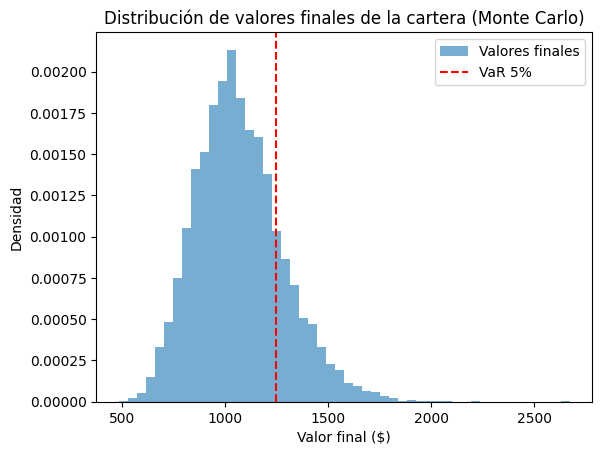

In [ ]:
#Visualizar la distribución de valores finales

plt.hist(valores_finales, bins=50, density=True, alpha = 0.6, label= "Valores finales")
plt.axvline(inversion_inicial-VaR_5, color ='red', linestyle = '--', label = 'VaR 5%')
plt.title("Distribución de valores finales de la cartera (Monte Carlo)")
plt.xlabel("Valor final ($)")
plt.ylabel("Densidad")
plt.legend()
plt.show